## OpenCV 설치

In [1]:
# !pip install opencv-python

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# 한글 출력을 위한 설정
from matplotlib import font_manager, rc
import platform
if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system()=='Windows':
    font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
# 음수 사용(마이너스 기호 깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False
import cv2

In [2]:
import cv2
print(cv2.__version__)

4.8.0


In [8]:
# 모든 값을 200으로 채운 2차원 행렬 생성
image=np.zeros((200,400), np.uint8)
image[:]=200
cv2.namedWindow("윈도우 생성")
cv2.imshow("윈도우 생성", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# 흰색 이미지 배열 생성
# 자료형을 np.uint8 로 설정
# 이미지는 0 - 255 사이의 숫자만 이용
# 이미지가 2차원이면 흑백, 3차원이면 컬러
image=np.zeros(shape=(512,512,3), dtype=np.uint8)+255
# 좌표 생성 - by 튜플
pt1=100,100
pt2=400,400
# RGB -> BGR 헤더쪽에서 거꾸로 되어있거든
cv2.rectangle(image,pt1,pt2,(0,0,255),2)
# 윈도우에 이미지 출력
cv2.imshow("image",image)
#키보드 입력 대기
cv2.waitKey(0)
#윈도우 종류
cv2.destroyAllWindows()

In [26]:
# 흰색 이미지 배열 생성
# 자료형을 np.uint8 로 설정
# 이미지는 0 - 255 사이의 숫자만 이용
# 이미지가 2차원이면 흑백, 3차원이면 컬러
image=np.zeros(shape=(512,512,3), dtype=np.uint8)+255
# 원 만들자
# 두께를 -1로 한다면 채워진 원이 나올 것이다.
cv2.circle(image,(image.shape[0]//2, image.shape[1]//2), radius=50,color=(0,0,255), thickness=-1)
# RGB -> BGR 헤더쪽에서 거꾸로 되어있거든
# 윈도우에 이미지 출력
cv2.imshow("image",image)
#키보드 입력 대기
cv2.waitKey(0)
#윈도우 종류
cv2.destroyAllWindows()

(2270, 3600)


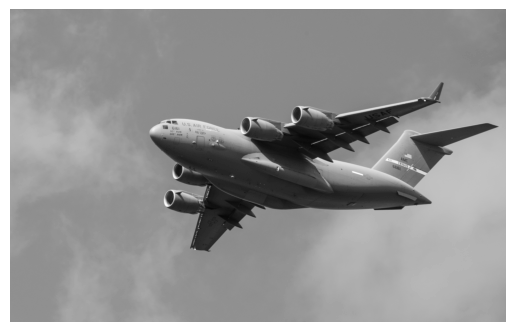

In [29]:
image=cv2.imread('./data/plane.jpg', cv2.IMREAD_GRAYSCALE)
# 이미지 데이터 흑백으로 가져오기
print(image.shape)
# C나 C++, python에서는 상수를 정의할 때 이름을 사용한 경우면
# 상수 대신에 값을 직접 입력해도 됩니다.
# cv2.IMREAD_GRAYSCALE 대신 0 입력해도 된다.
# 하지만 상수 이름을 사용하는 것을 권장합니다.
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

(2270, 3600, 3)


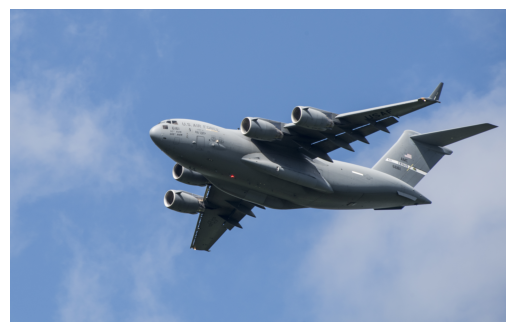

In [32]:
image=cv2.imread('./data/plane.jpg', cv2.IMREAD_COLOR)
# 이미지 데이터 흑백으로 가져오기
print(image.shape)
# opencv는 rgb로 가져오는게 아닌, bgr로 가져온다.
# color는 cmap을 안주면 됩니다.
img_rgb=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [33]:
image=cv2.imread('./data/plane.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('./data/plane_new.jpg',image)

True

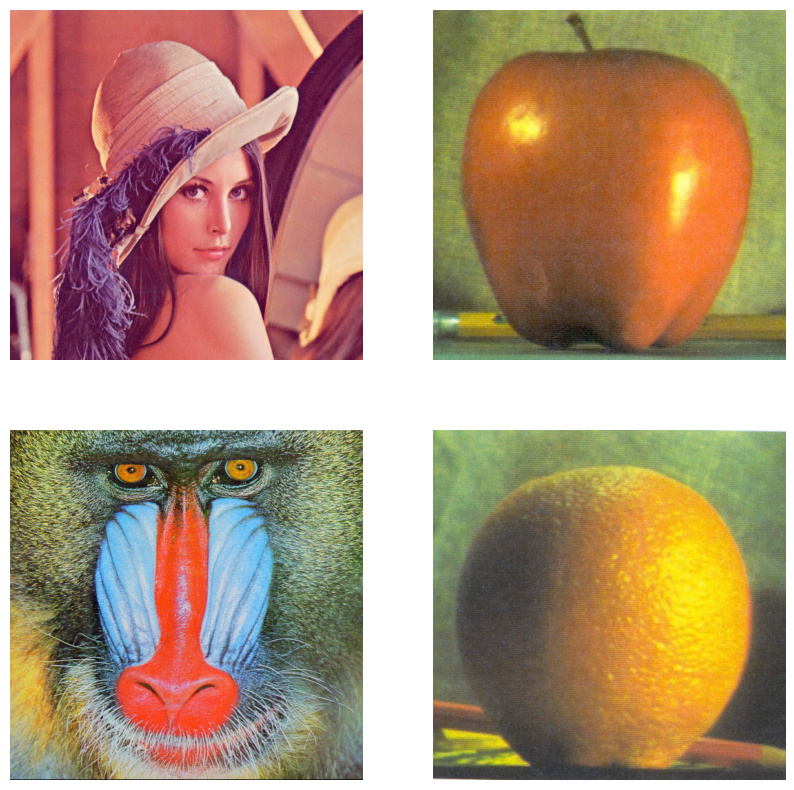

In [40]:
# 4개의 이미지를 2*2 로 출력
DATA_DIR='./data/'
imgBGRs=[]
imgBGRs.append(cv2.imread(DATA_DIR+'lena.jpg'))
imgBGRs.append(cv2.imread(DATA_DIR+'apple.jpg'))
imgBGRs.append(cv2.imread(DATA_DIR+'baboon.jpg'))
imgBGRs.append(cv2.imread(DATA_DIR+'orange.jpg'))
imgRGBs=[]
for i in imgBGRs:
    imgRGBs.append(cv2.cvtColor(i,cv2.COLOR_BGR2RGB))
# 여러 개의 영역 만들기
fig, ax=plt.subplots(2,2, figsize=(10,10), sharey=True)
length=len(imgRGBs)
# sharey는 축을 공유하는 것
for i in range(length):
    ax[i//2][i%2].axis('off')
    ax[i//2][i%2].imshow(imgRGBs[i],aspect='auto')
plt.show()

In [42]:
## 카메라 캡쳐
# 문자열 출력 함수
def put_string(frame, text, pt, value, color=(120,200,90)):
    text+=str(value)
    shade=(pt[0]+2,pt[1]+2) #좌우 상하 2정도 추가
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, text,shade, font, 0.7, (0,0,0), 2) #그림자
    cv2.putText(frame, text,pt, font, 0.7, color, 2)
# 현재 디바이스의 첫번째 카메라 연결
capture=cv2.VideoCapture(0)
# 카메라 연결이 안된다면, 종료
if capture.isOpened()==False:
    raise Exception('카메라 연결 안됨')
while True:
    ret, frame=capture.read()
    if not ret:
        break
    if cv2.waitKey(30)>=0:
        break
    exposure=capture.get(cv2.CAP_PROP_EXPOSURE)
    put_string(frame, "EXPOS: ", (10,40), exposure)
    title="View Frame From Camera"
    cv2.imshow(title, frame)
capture.release()

In [2]:
# wifi smartphone
cap=cv2.VideoCapture('http://IP:port/video') 
#iphone : video, android : mjpegfeed
# frame_size : 카메라 해상도 확인
frame_size=(int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
           int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size= ' ,frame_size) #이거 값이 뭐라도 나와야 함
while True:
    # 실제 스마트폰 카메라가 촬영하고 있는 영상을 가져오기
    retval, frame=cap.read()
    if not retval:
        break
    # 영상을 화면에 출력하기
    cv2.imshow('frame',frame)
    # 키보드 대기하기
    key=cv2.waitKey(25)
    if key==27: #27이 esc이다.
        # esc를 누르면 종료한다.
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

frame_size=  (0, 0)


In [7]:
img=cv2.imread('./data/lena.jpg',cv2.IMREAD_GRAYSCALE)
# print('img shape', img.shape)
# 2차원 이미지를 1차원으로 변경해주자. - flatten
img=img.flatten()
# 1차원으로 잘 변경되었다.
# print('img shape', img.shape)
# 이걸 또 3차원으로 바꿔?
# -1은 나머지를 "전부" 사용한다는 의미입니다.
# 262144/512/512가 첫 번째 차원입니다.
# 두개만 계산하고 나머지 그냥 넣어서 좀 더 편리하게 함
img=img.reshape(-1,512,512)
# 첫 번째 차원은 1이 됩니다.
print('img shape',img.shape)

img shape (1, 512, 512)


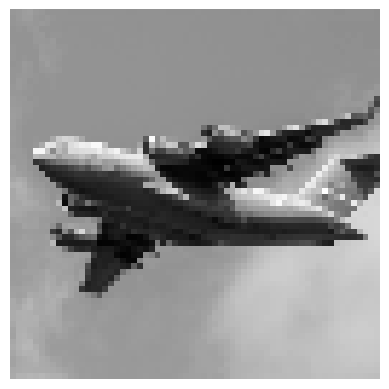

In [9]:
img=cv2.imread('./data/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)
img=cv2.resize(img, (64,64)) #좀 깨져보인다.
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

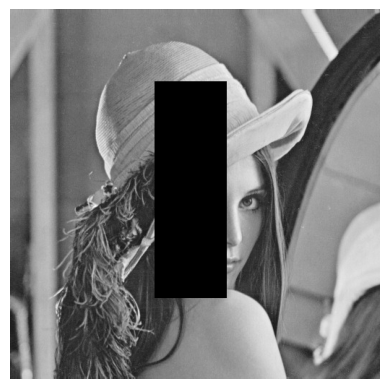

In [10]:
img=cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
img[100,200]=0
img[100:400, 200:300]=0
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
# 이미지의 특정 부분을 선택하는 것 : ROI
# 이미지 전처리의 핵심 중 하나가 
#ROI 부분을 다른 부분과 확연하게 구분되도록 하는 것

(512, 512, 3)


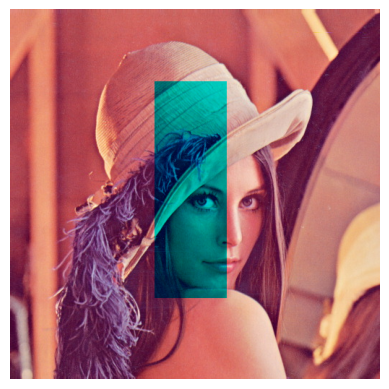

In [16]:
img=cv2.imread('./data/lena.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
# shape : 가로, 세로, 색상 채널
# 색상채널 접근때리기
# 0, 1, 2 있는데 0 이 R인걸로 보아 RGB 형태네
img[100:400,200:300, 0]=0 
# R값이 빠지니까 CYAN으로 변한 것을 볼 수 있다.
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img=cv2.imread('./data/lena.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
roi=cv2.selectROI(img)
print('roi : ', roi)
# 선택 영역만 추출
img=img[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]]
cv.imshow("IMG",img)
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
img=cv2.imread('./data/lena.jpg')
# img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 채널 분할
b, g, r=cv2.split(img)
# 채널 병합
img=cv2.merge([b,g,r])
cv2.imshow("IMG",img)
cv2.waitKey()
cv2.destroyAllWindows()

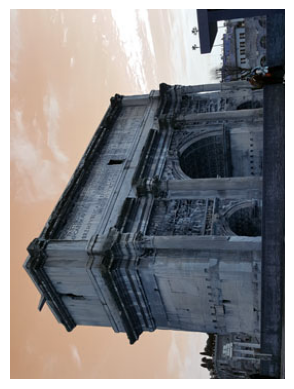

In [37]:
img=cv2.imread('./data/flip_test.jpg')
# flip_img=cv2.flip(img,-1)
# plt.imshow(flip_img)
# transpose : 행 열 전치하기
# transpose_img=cv2.transpose(img)
# plt.imshow(transpose_img)
# 회전 : rotate
rotate_img=cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
rotate_img=cv2.rotate(img, cv2.ROTATE_180)
rotate_img=cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(rotate_img)
plt.axis('off')
plt.show()

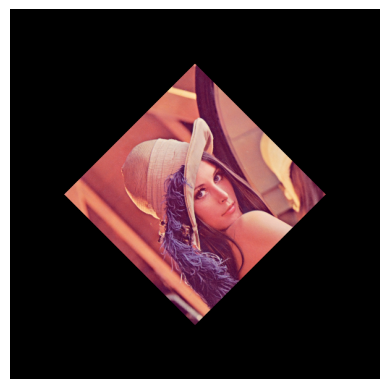

In [42]:
src=cv2.imread('./data/lena.jpg')
src=cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
rows,cols,channels=src.shape
# 중앙을 기준으로 45도 회전, 0.5배 축소 이미지
M1=cv2.getRotationMatrix2D((rows/2,cols/2), 45, 0.5)
src=cv2.warpAffine(src,M1,(rows,cols))
plt.imshow(src)
plt.axis('off')
plt.show()